![](https://excellenceassured.com/wp-content/uploads/2015/09/16-personality-types.png)

In [1]:
import pandas as pd
import numpy as np
import re
import gensim
from gensim.utils import simple_preprocess 
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from textblob import TextBlob
from tqdm import tqdm
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../input/mbti-type/mbti_1.csv')
print(data.shape)
data.head()

(8675, 2)


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


## Types col

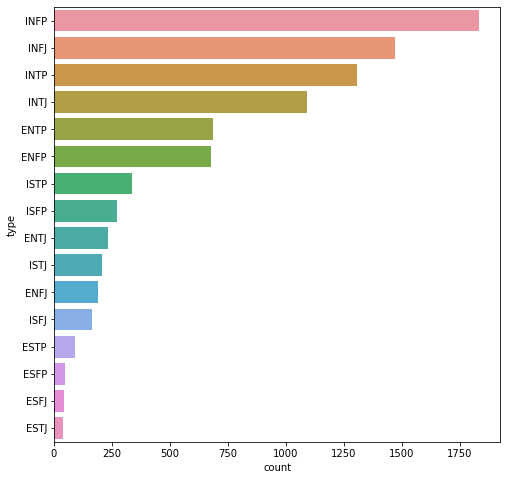

In [3]:
## plotting the number of people in each type
plt.figure(figsize = [8,8])
ordered_type = data['type'].value_counts().index
sns.countplot(y=data['type'],order = ordered_type)

Its no way near a uniform distribution, we can see that more people tend to be from INFP, INFJ, INTP. and its rare to find one having the type ESTP, ESFP, ESFJ and ESTJ

In [4]:
import string
def clean_text(text):
    text = text.lower()
    text = text.replace('|||',' ')
    text = re.sub('https?://\S+|www\.youtube\S+', 'youtube', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

data['clean'] = data['posts'].apply(clean_text) # cleans each sentence
print('Sentences are cleaned')

data['words'] = data['clean'].apply(word_tokenize) # converts the cleaned senteces into list of words
print('Word Tokenizing done')

stop_words = stopwords.words('english')
# stop_words.extend(['im','like','would','ive'])
def remove_stop_words(text):
    return [x for x in text if not x in stop_words]

data['words_wo_stopwords'] = data['words'].apply(remove_stop_words) # from list of words, removes stopwords
print('Stop words Removed')

data['posts_preprocessed'] = data['words_wo_stopwords'].apply(lambda x:" ".join(x)) 
# joins the words to form senteces again
print('Word Preprocesing done')

Sentences are cleaned
Word Tokenizing done
Stop words Removed
Word Preprocesing done


In [5]:
def get_top_n_imp_words(corpus,full_corpus,n=10):
    
    vec = TfidfVectorizer().fit(full_corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

imp_words_dict = {}
for personality in tqdm(data['type'].unique()):
    personality_data = data[data['type'] == personality]
#     print(personality)
    imp_words = get_top_n_imp_words(personality_data['posts_preprocessed'],data['posts_preprocessed'])
#     print(imp_words)
    imp_words_dict[personality] = imp_words

100%|██████████| 16/16 [02:08<00:00,  8.02s/it]


In [6]:
# imp_words_dict

In [7]:
def load_mask_image(path):
    mask = np.array(Image.open(path))
    mask[mask < 200] = 0
    mask[mask >= 200] = 255
    return mask

mask = load_mask_image('../input/mask-image/mask.png')


In [8]:
def typewise_properties(pers_type,data = data):
    
    personality_data = data[data['type'] == pers_type]
    text = " ".join(personality_data['posts_preprocessed'].tolist())
    wc = WordCloud(background_color="white", max_words=200, mask=mask,
                   stopwords=stop_words, contour_width=3)

    # Generate a wordcloud
    wc.generate(text)

    # show
    plt.figure(figsize=[20,6])
    plt.subplot(121)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

    plt.subplot(122)
    tuples = imp_words_dict[pers_type]
    words = [x[0] for x in tuples]
    imp = [x[1] for x in tuples]
    sns.barplot(y = words,x = imp)
    plt.title('Important Words')
    plt.xlabel('Importance - tfidf value')

# ISTJ:Logistician
Practical and fact-minded individuals whose reliability cannot be doubted 

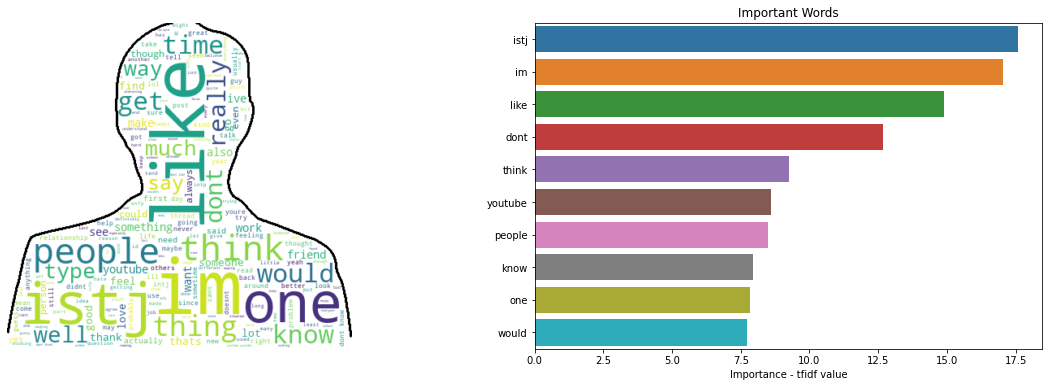

In [9]:
typewise_properties('ISTJ')

# ISFJ: Defender 
Very dedicated and warm protectors, always ready to defend their loved ones

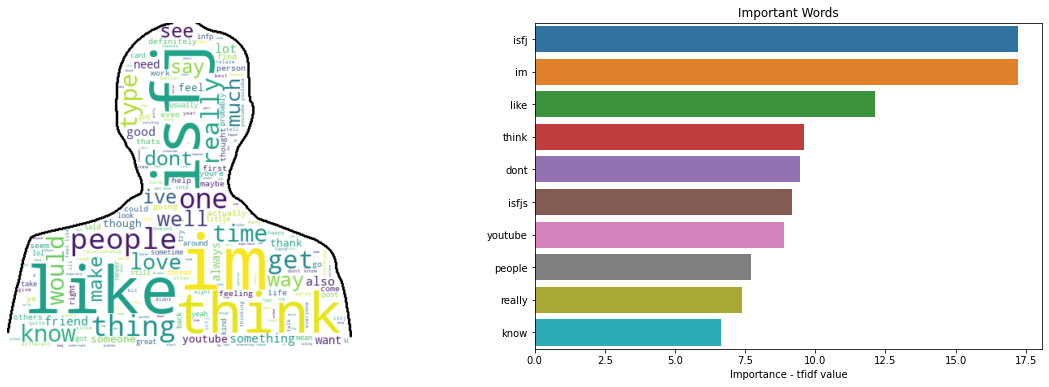

In [10]:
typewise_properties('ISFJ')

# INFJ: Advocate
Quiet and mystical , yet very inspiring and tireless idealists.

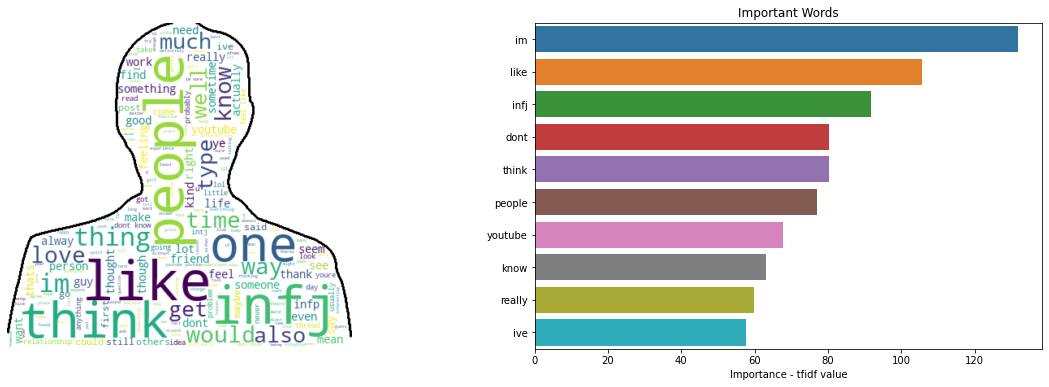

In [11]:
typewise_properties('INFJ')

# INTJ: Architect
Imaginative and strategic thinkers, with a plan for everything

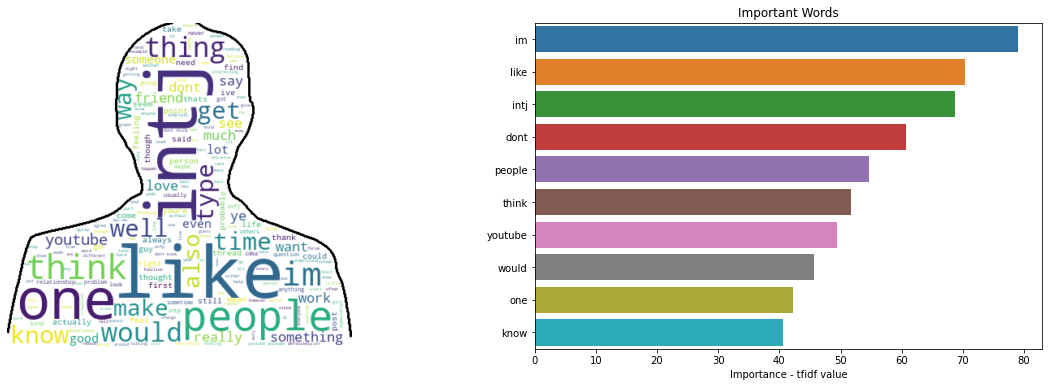

In [12]:
typewise_properties('INTJ')

# ISTP: Virtuoso
Bold and practical experimenter, master of all kinds of tools 

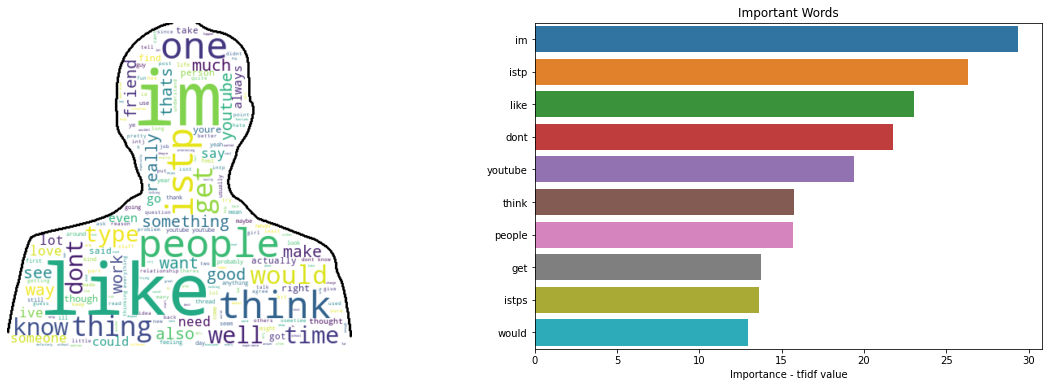

In [13]:
typewise_properties('ISTP')

# ISFP: Adventurer
Flexible and charming artists, always ready to explore and experince something new

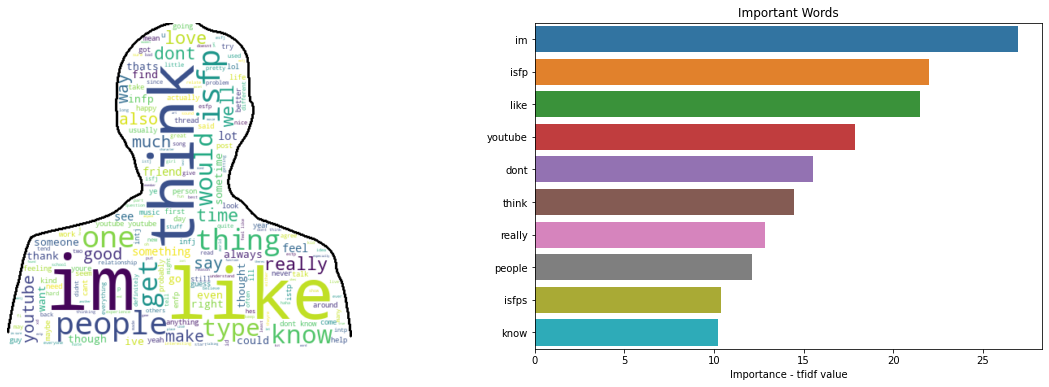

In [14]:
typewise_properties('ISFP')

# INFP: Mediater
Poetic, kind and altruistic people, always eager to help a good cause. 

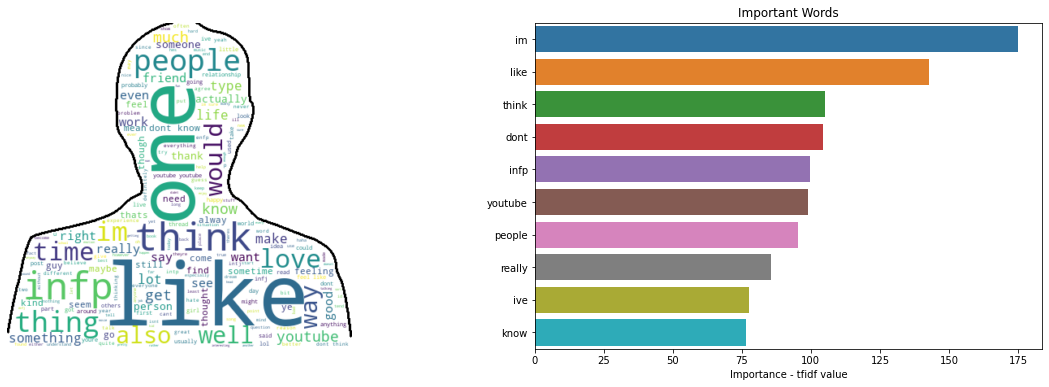

In [15]:
typewise_properties('INFP')

# INTP: Logician 
Innovative inventors with an inquenchable thirst for knowledge

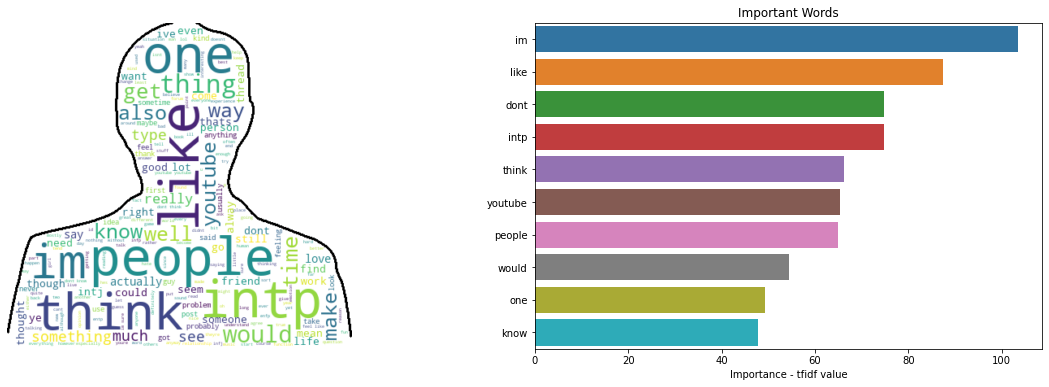

In [16]:
typewise_properties('INTP')

# ESTP: Entrepreneur
Smart, energetic and very perceptive people who truely enjoy living on the edge

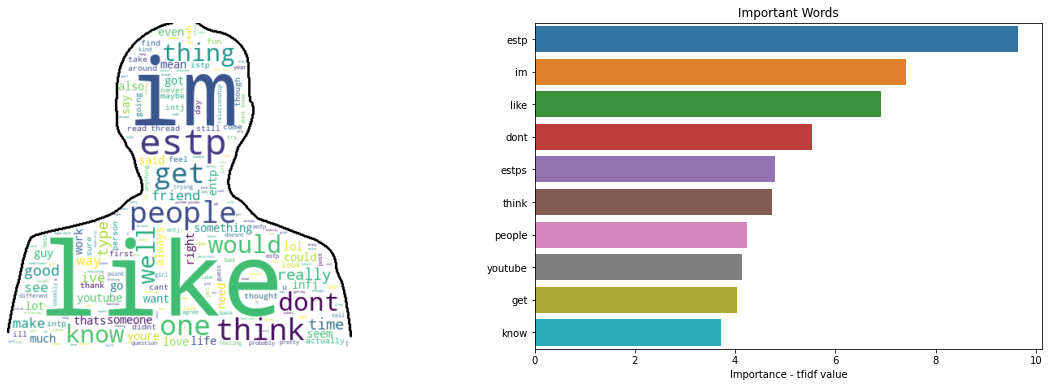

In [17]:
typewise_properties('ESTP')

# ESFP: Entertainer
Spontanous, energetic and enthusiastic people, life is never boring around them

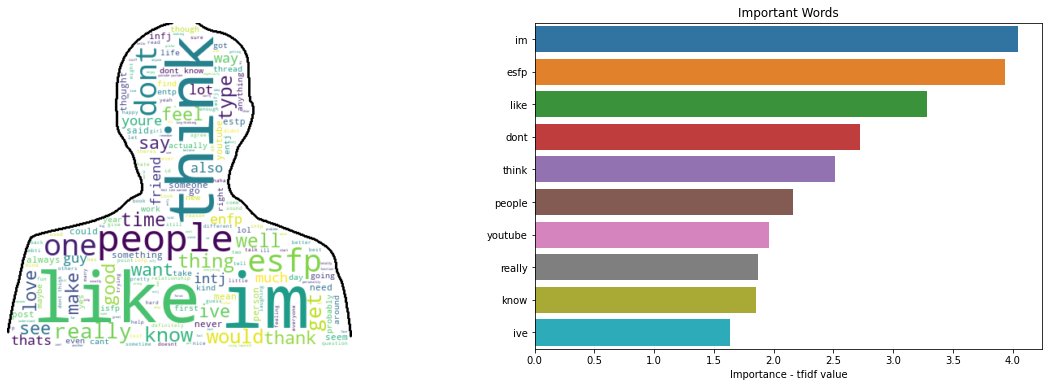

In [18]:
typewise_properties('ESFP')

# ENFP: Campaigner
Enthusiastic, creative and sociable free spirits, who can always find a reason to smile.

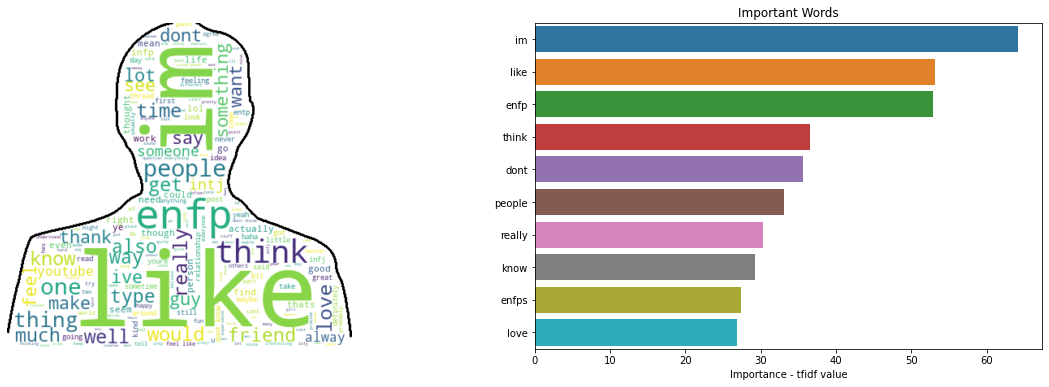

In [19]:
typewise_properties('ENFP')

# ENTP: Debator
Smart and curious thinker who cannot resist an intellectual challenge

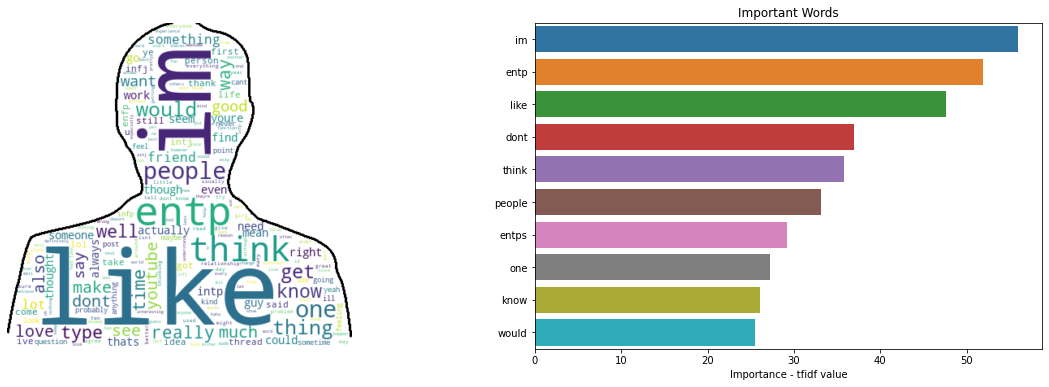

In [20]:
typewise_properties('ENTP')

# ESTJ: Executive
Excellent administrators, unsurparsed at managing things or people

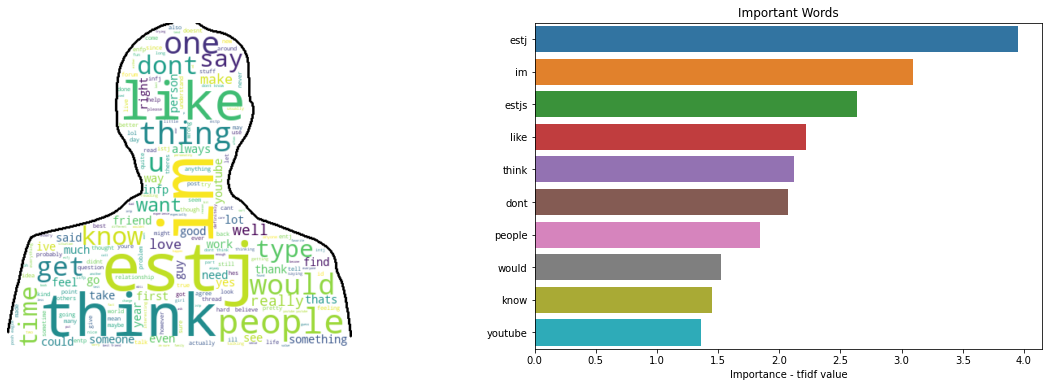

In [21]:
typewise_properties('ESTJ')

# ESFJ: Consul
Extraordinarily caring, social and popular people, always eager to help

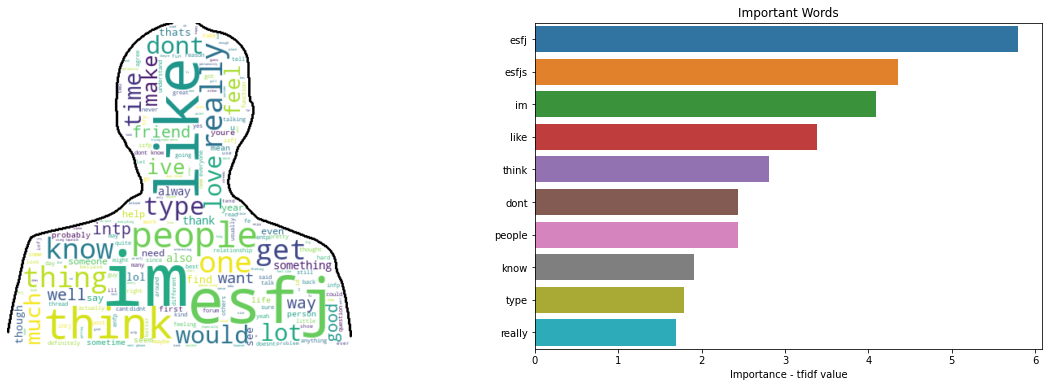

In [22]:
typewise_properties('ESFJ')

# ENFJ: Protagonist
Charismatics and inspiring leaders, able to mesmerize their listeners

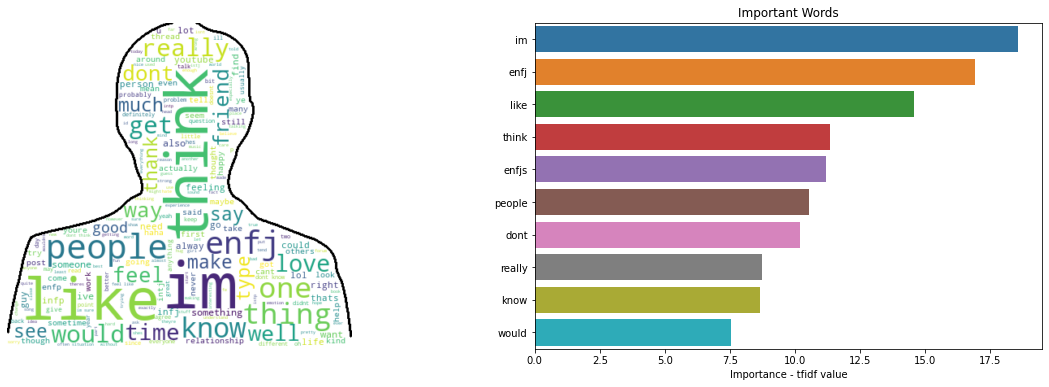

In [23]:
typewise_properties('ENFJ')

# ENTJ: Commander
Bold, imaginative and strong willed leaders, always finding a way, or making one. 

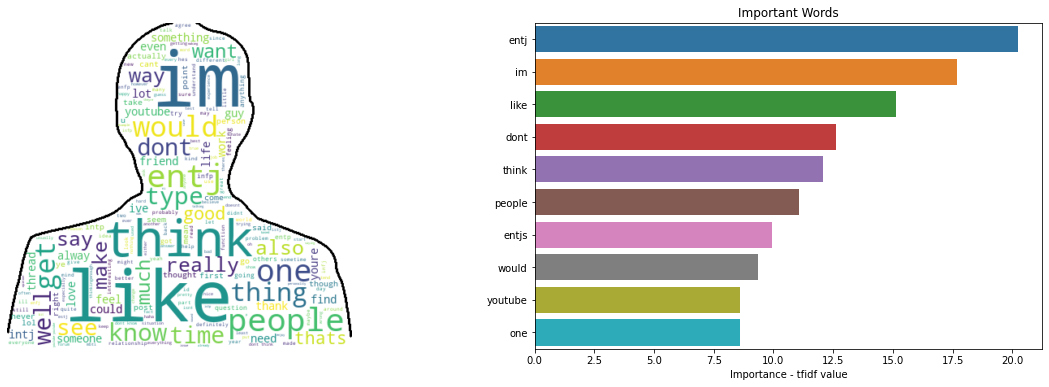

In [24]:
typewise_properties('ENTJ')

# Which type watches more Youtube?
![](https://www.youtube.com/about/static/svgs/icons/brand-resources/YouTube-logo-full_color_light.svg?cache=72a5d9c)

In [25]:
data['num_youtube'] = data['words_wo_stopwords'].apply(lambda x: x.count('youtube'))

In [26]:
personalities = []
youtube_instances_per_user_list = []
for personality in data['type'].unique():
    personality_data = data[data['type'] == personality]
    youtube_instances_per_user = personality_data['num_youtube'].sum() / len(personality_data)
    personalities.append(personality)
    youtube_instances_per_user_list.append(youtube_instances_per_user)
#     print(personality ,str(' - '),youtube_instances_per_user)

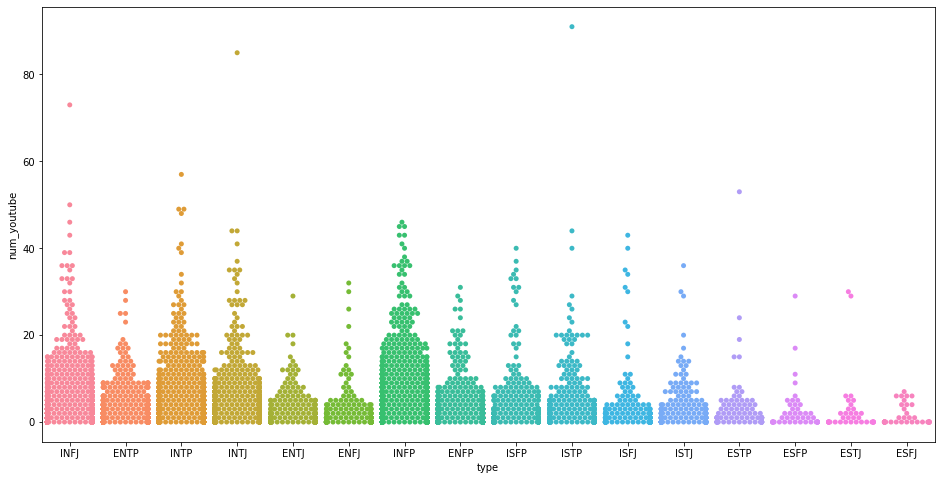

In [27]:
plt.figure(figsize = [16,8])
sns.swarmplot('type','num_youtube',data=data)

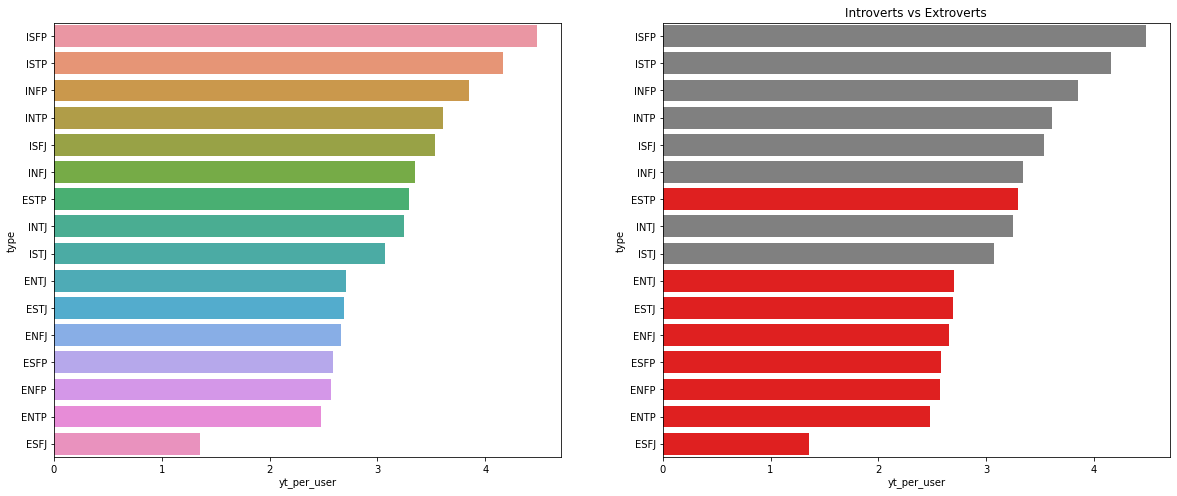

In [28]:
df = pd.DataFrame({'type':personalities,'yt_per_user':youtube_instances_per_user_list})
df = df.sort_values(by='yt_per_user',ascending=False)

plt.figure(figsize = [20,8])
plt.subplot(121)
sns.barplot('yt_per_user','type',data=df)

plt.subplot(122)
colors = ['grey']*6
colors.extend(['red'])
colors.extend(['grey']*2)
colors.extend(['red']*7)
plt.title('Introverts vs Extroverts')
sns.barplot('yt_per_user','type',data=df,palette=colors)

As it turns out, (kind of expected), Introverts watch way more youtube then Extroverts do.

# Sentiments of each individual type

In [29]:
def add_sentiment(dataframe, column):
    '''
    PARAMETERS - 
        dataframe - pandas DataFrame object
        column - column in dataframe which contains the text to which sentiment is applied 
    
    RETURNS - 
        pandas dataframe, polarity Subjectivity for each text
    
    '''
    text_column = dataframe[column]
    textblob_sentiment = text_column.apply(TextBlob)
    
    sentiment_values = [ {'Polarity': v.sentiment.polarity,
                         'Subjectivity': v.sentiment.subjectivity}
                   for v in tqdm(textblob_sentiment.values)]
    df =  pd.DataFrame(sentiment_values)
    return pd.concat([dataframe,df],axis=1)

In [30]:
data_sentiments = add_sentiment(data,'clean')

100%|██████████| 8675/8675 [01:14<00:00, 116.61it/s]


In [31]:
data_sentiments.head()

,type,posts,clean,words,words_wo_stopwords,posts_preprocessed,num_youtube,Polarity,Subjectivity
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,youtube youtube enfp and intj moments youtube...,"[youtube, youtube, enfp, and, intj, moments, y...","[youtube, youtube, enfp, intj, moments, youtub...",youtube youtube enfp intj moments youtube spor...,24,0.169181,0.502012
1,ENTP,'I'm finding the lack of me in these posts ver...,im finding the lack of me in these posts very ...,"[im, finding, the, lack, of, me, in, these, po...","[im, finding, lack, posts, alarming, sex, bori...",im finding lack posts alarming sex boring posi...,9,0.083652,0.494495
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one youtube of course to which i say ...,"[good, one, youtube, of, course, to, which, i,...","[good, one, youtube, course, say, know, thats,...",good one youtube course say know thats blessin...,5,0.139684,0.584298
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp i enjoyed our conversation the oth...,"[dear, intp, i, enjoyed, our, conversation, th...","[dear, intp, enjoyed, conversation, day, esote...",dear intp enjoyed conversation day esoteric ga...,2,0.129623,0.551175
4,ENTJ,'You're fired.|||That's another silly misconce...,youre fired thats another silly misconception ...,"[youre, fired, thats, another, silly, misconce...","[youre, fired, thats, another, silly, misconce...",youre fired thats another silly misconception ...,6,0.069817,0.508572


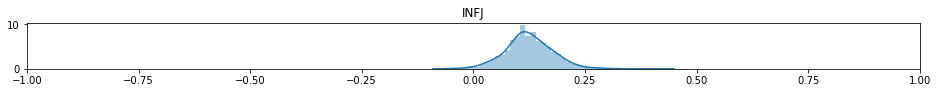

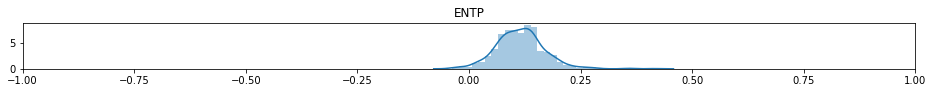

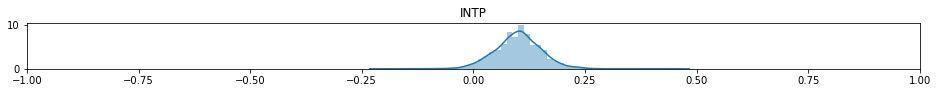

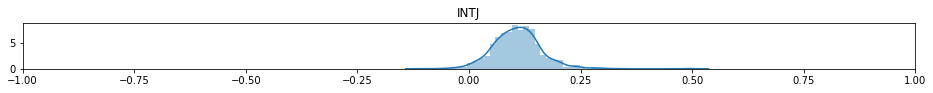

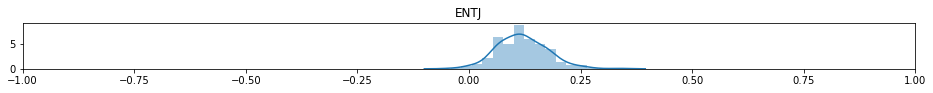

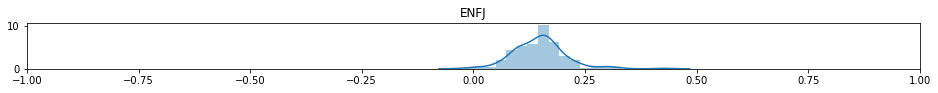

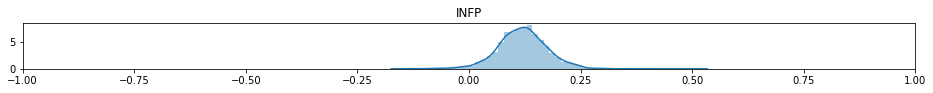

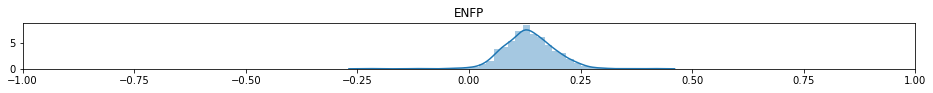

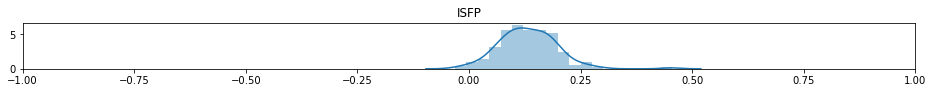

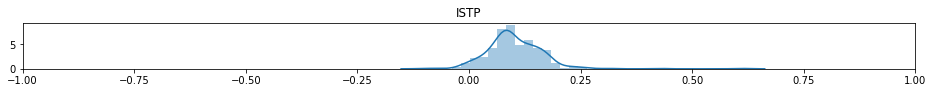

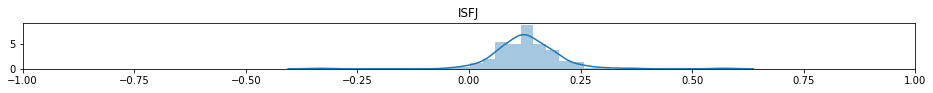

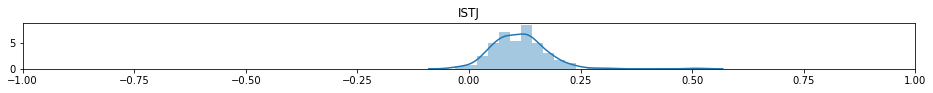

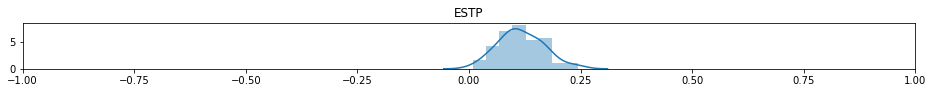

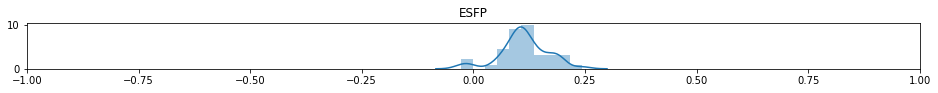

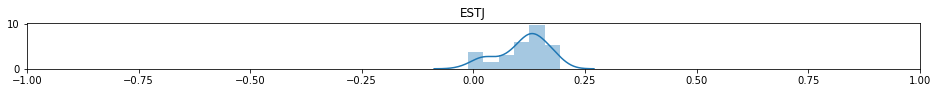

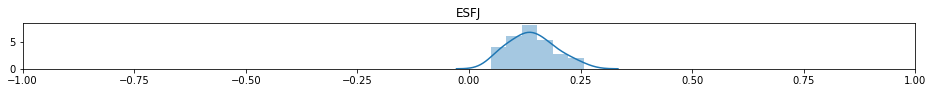

In [32]:
for (i,personality) in enumerate(data_sentiments['type'].unique()):
    personality_data = data_sentiments[data_sentiments['type'] == personality]
    polarity_values = np.array(personality_data['Polarity'])
    plt.figure(figsize = (16,16))
    plt.subplot(16,1,i+1)
    sns.distplot(polarity_values)
    plt.title(str(personality))
    plt.xlim((-1,1))
    

# What is more obsessed about themselves?
We look at how many times the users searched about their personalities types for all the different types.

In [33]:
personalities = []
searched_per_user = []
for personality in data['type'].unique():
    personalities.append(personality)
    personality_data = data[data['type'] == personality]
    personality_data['own'] = personality_data['clean'].apply(lambda x: x.count(personality.lower()))
    own_per_user = personality_data['own'].sum() / len(data)
    searched_per_user.append(own_per_user)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


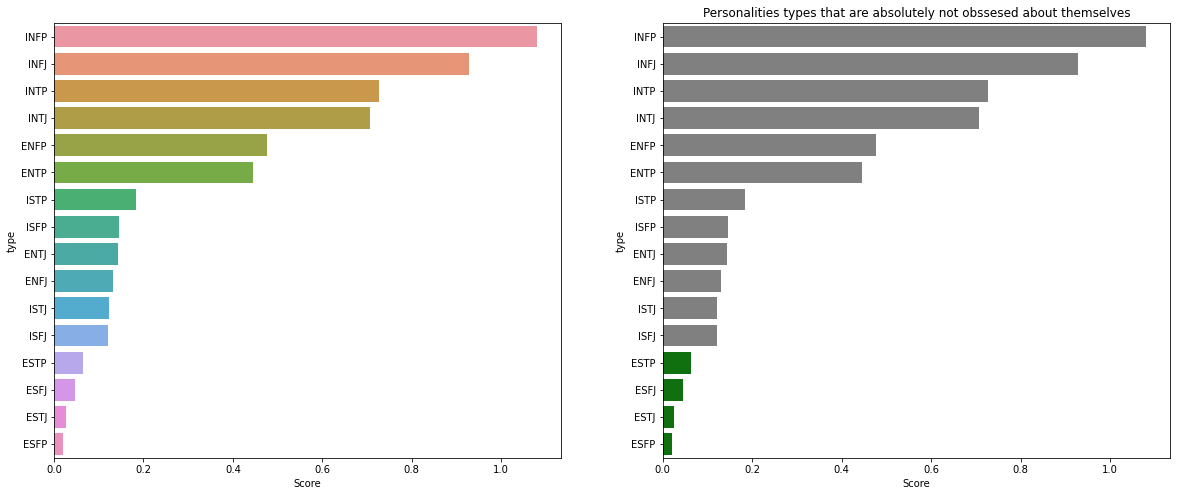

In [34]:
df = pd.DataFrame({'type':personalities,'Score':searched_per_user})
df = df.sort_values(by='Score',ascending=False)

plt.figure(figsize = [20,8])
plt.subplot(121)
sns.barplot('Score','type',data=df)

plt.subplot(122)
colors = ['grey']*12
colors.extend(['green']*4)
plt.title('Personalities types that are absolutely not obssesed about themselves')
sns.barplot('Score','type',data=df,palette=colors)

At one side we have INFP, INFJ, INTP, INTJ who search about their own personality type, and on the other side we have ESTP, ESFJ ESFP have a lot more to do then search for their personality type. :)

# Who are more obsessed in talking about others?
We will look at which personality types seacrh other types the most? I am expecting extroverts to shine here. Lets see

In [35]:
def count_all_instances(sentence):
    count = 0
    for personality in data['type'].unique():
        personality = personality.lower()
        count += sentence.count(personality)
    return count

In [36]:
personalities = []
score = []
for personality in data['type'].unique():
    personalities.append(personality)
    personality_data = data[data['type'] == personality]
    personality_data['own'] = personality_data['clean'].apply(lambda x: x.count(personality.lower()))
    personality_data['all'] = personality_data['clean'].apply(count_all_instances)
    personality_data['others'] = (personality_data['all'] - personality_data['own'] ) 
    other_per_user = personality_data['others'].sum() / len(personality_data)
    score.append(other_per_user)
#     print(personality ,str(' - '), other_per_user)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

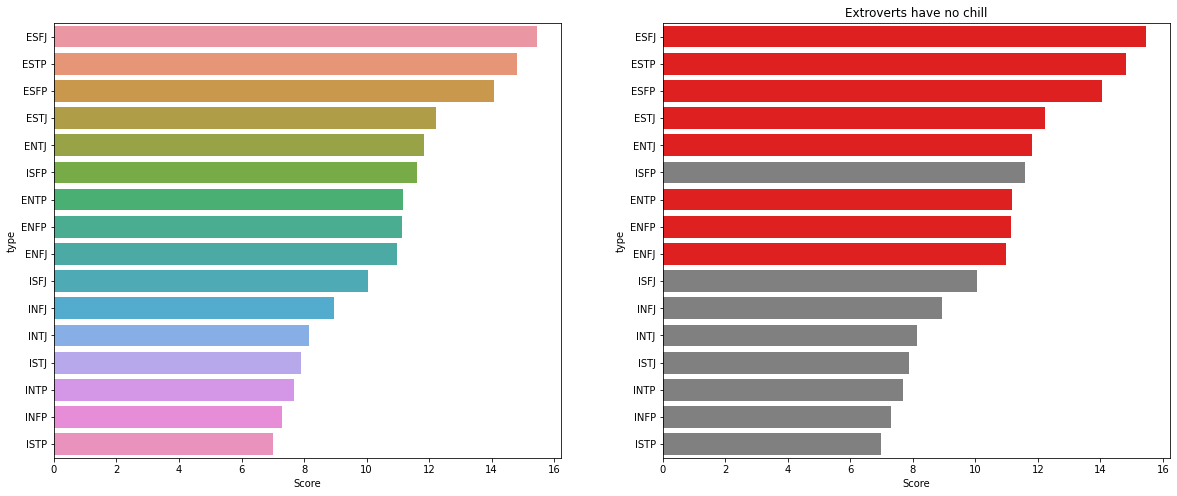

In [37]:
df = pd.DataFrame({'type':personalities,'Score':score})
df = df.sort_values(by='Score',ascending=False)

plt.figure(figsize = [20,8])
plt.subplot(121)
sns.barplot('Score','type',data=df)

plt.subplot(122)
colors = ['red']*5
colors.extend(['grey'])
colors.extend(['red']*3)
colors.extend(['grey']*7)
plt.title('Extroverts have no chill')
sns.barplot('Score','type',data=df,palette=colors)

## Corrections, Improvements, Suggestions are highly welcome. 
Thank you, Namaste